In [41]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer, load_iris
import sys 
sys.path.append('../utils')

from model_functions import ModelPipeline, splitting
from woe_functions import WoeTransformer

In [12]:
lgb_params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "max_bin": 5,
        "max_depth" : 2,
        "num_leaves": 5,
        "min_data_in_leaf" : 5,
        "learning_rate": 0.2,
        "regularization": 'lambda_l2',
        "bagging_fraction": 0.7,
        "feature_fraction": 0.5,
        "bagging_seed": 2018,
        "verbosity": -1
    }

In [46]:
data = load_breast_cancer()

In [47]:
train = pd.DataFrame(data['data'], columns=data.feature_names)
y = pd.Series(data.target, name='target').to_frame()

building Lightgbm with all features:
Training until validation scores don't improve for 100 rounds
[20]	valid_0's binary_logloss: 0.159753
[40]	valid_0's binary_logloss: 0.138444
[60]	valid_0's binary_logloss: 0.115054
[80]	valid_0's binary_logloss: 0.107689
[100]	valid_0's binary_logloss: 0.0987502
[120]	valid_0's binary_logloss: 0.098458
[140]	valid_0's binary_logloss: 0.098872
[160]	valid_0's binary_logloss: 0.102709
[180]	valid_0's binary_logloss: 0.0991479
[200]	valid_0's binary_logloss: 0.102241
Early stopping, best iteration is:
[107]	valid_0's binary_logloss: 0.0945165


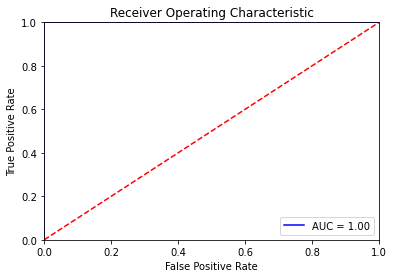

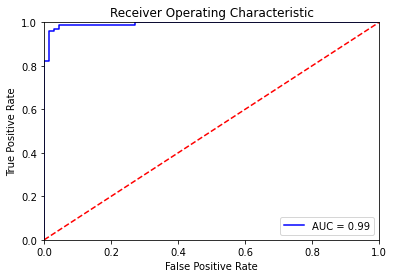

top features:
worst concave points
area error
mean concave points
mean texture
mean compactness
worst radius
worst perimeter
worst texture
fractal dimension error
worst concavity
worst smoothness
perimeter error
symmetry error
compactness error
smoothness error
concave points error
mean smoothness
worst area
mean symmetry
mean concavity
worst fractal dimension
radius error
mean fractal dimension
worst compactness
concavity error
mean area
mean perimeter
worst symmetry
mean radius
texture error


building Lightgbm with only top features:
Training until validation scores don't improve for 100 rounds
[20]	valid_0's binary_logloss: 0.159753
[40]	valid_0's binary_logloss: 0.138444
[60]	valid_0's binary_logloss: 0.115054
[80]	valid_0's binary_logloss: 0.107689
[100]	valid_0's binary_logloss: 0.0987502
[120]	valid_0's binary_logloss: 0.098458
[140]	valid_0's binary_logloss: 0.098872
[160]	valid_0's binary_logloss: 0.102709
[180]	valid_0's binary_logloss: 0.0991479
[200]	valid_0's binary_loglo

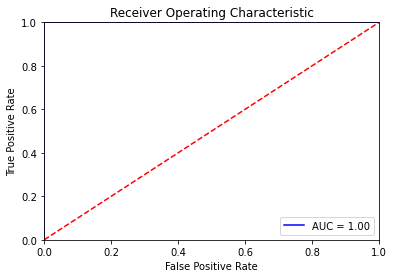

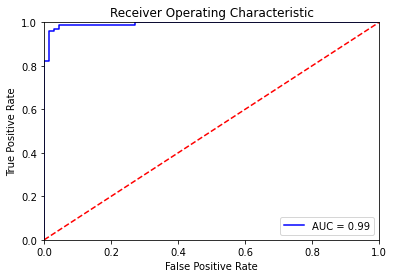

build woe transform:
build logistic regression with woe columns


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


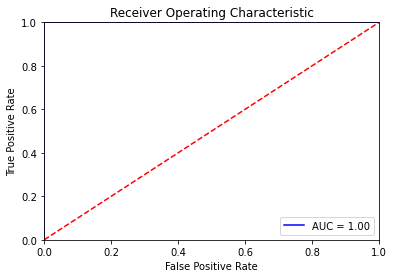

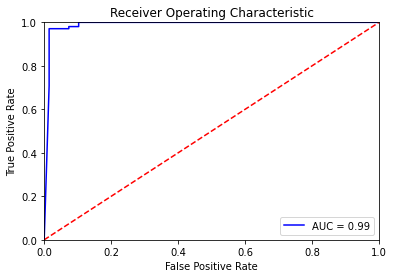

In [48]:
model = ModelPipeline(*splitting(train, y), lgb_params=lgb_params)
model.build()

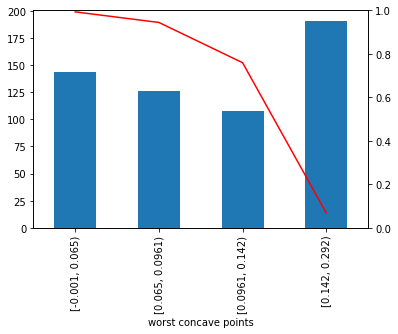

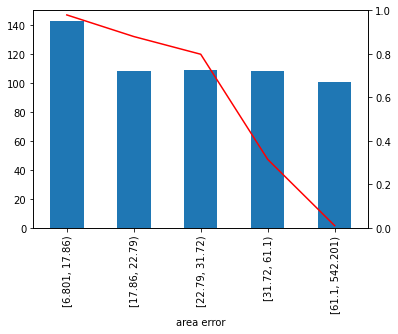

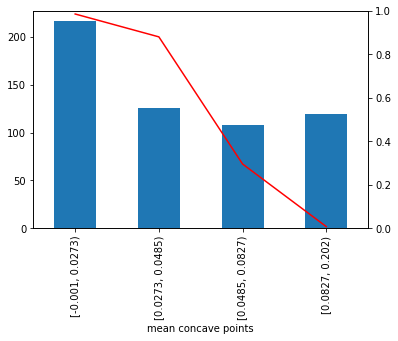

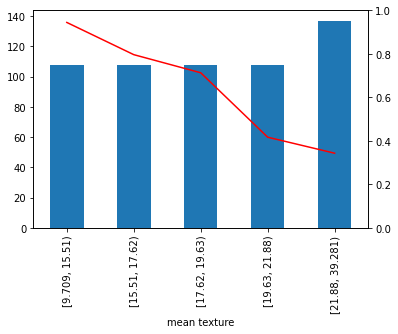

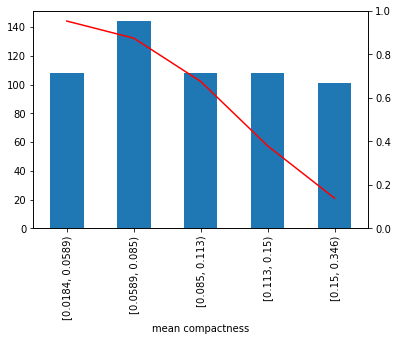

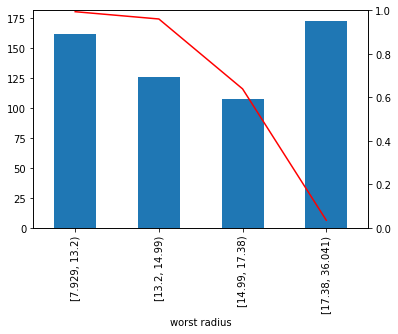

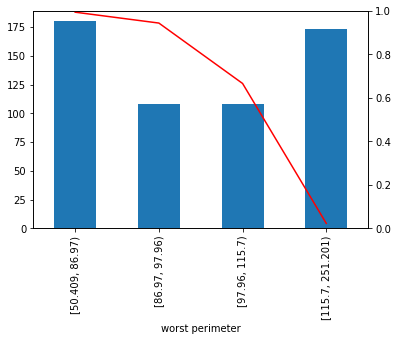

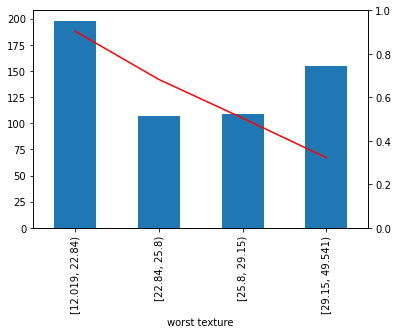

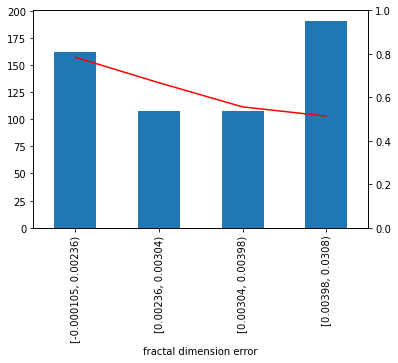

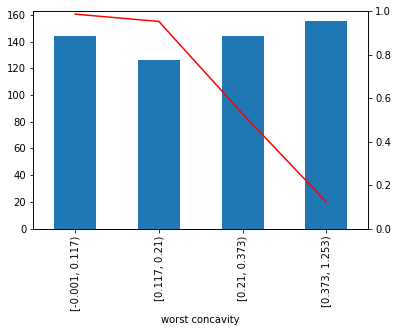

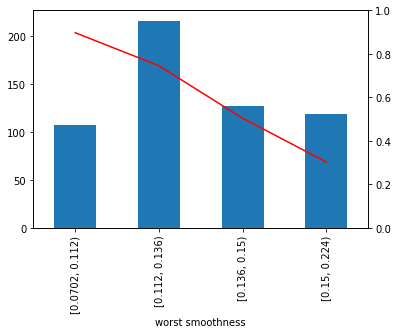

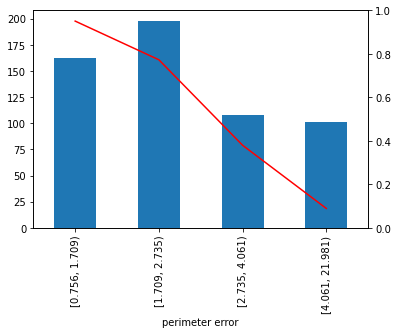

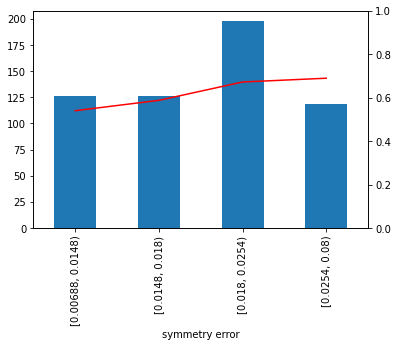

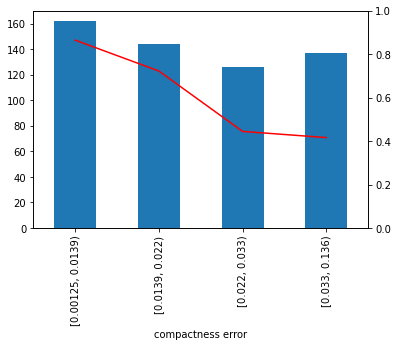

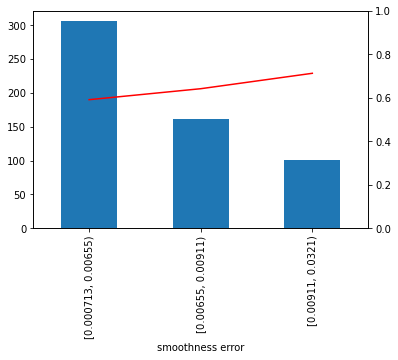

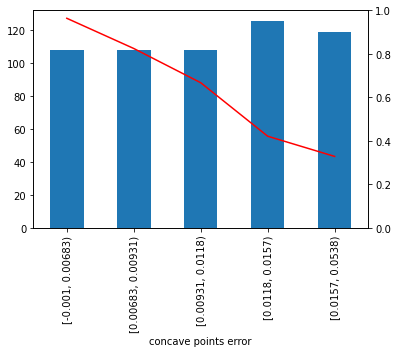

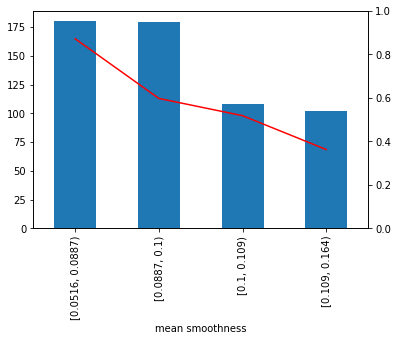

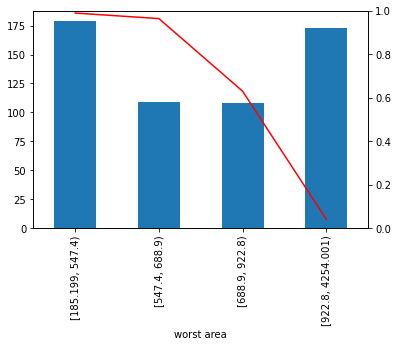

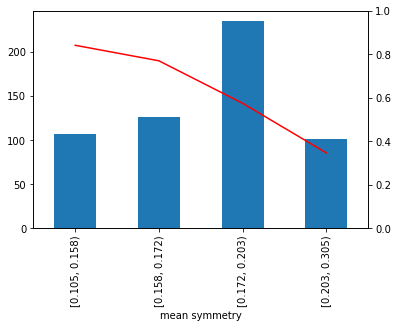

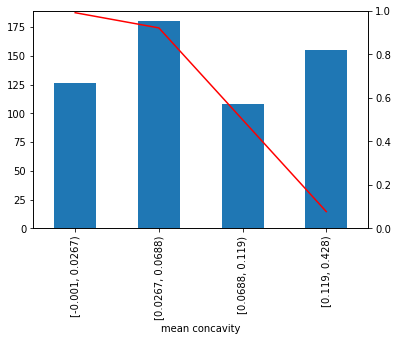

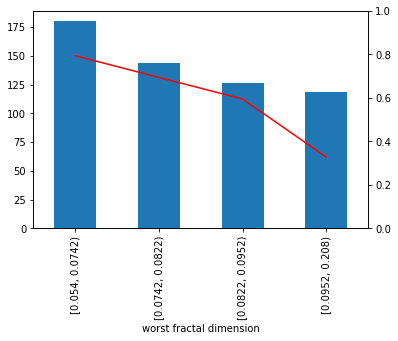

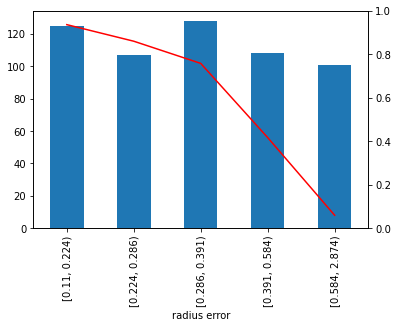

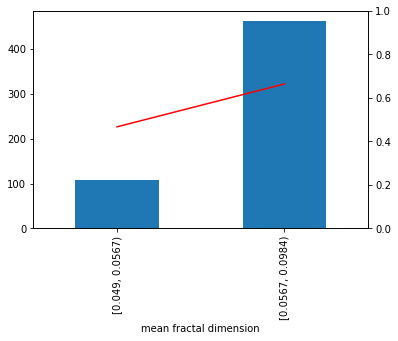

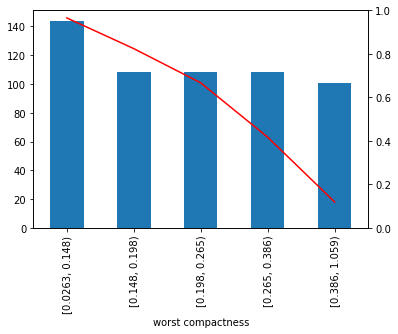

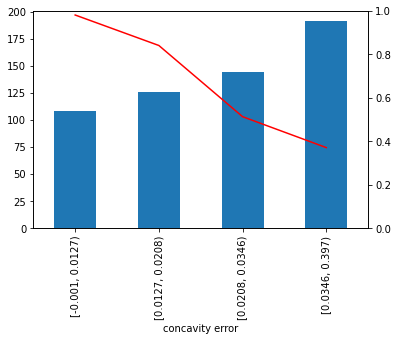

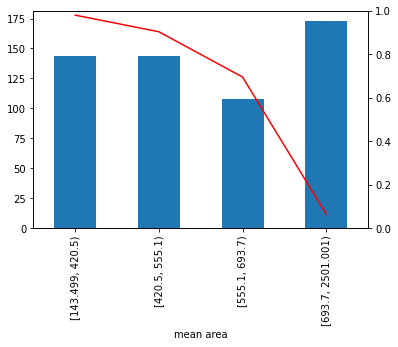

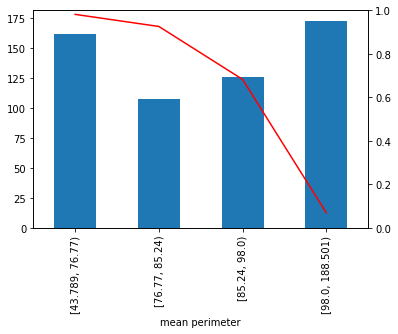

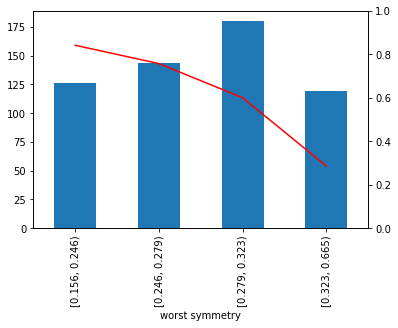

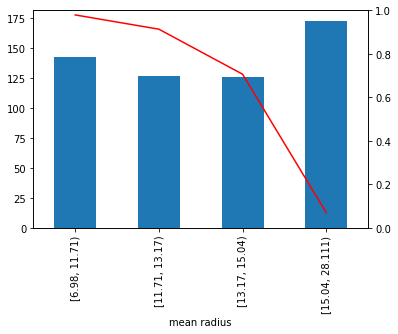

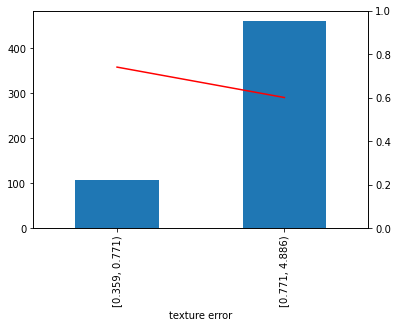

In [49]:
model.draw_woe(y_lim=(0, 1))